optimal poolsize=[50.]
[200.]
optimal poolsize=[1.]
[100.]
optimal poolsize=[11.]
[1955.7083665]


2.782106008338973

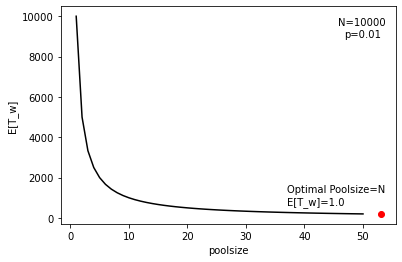

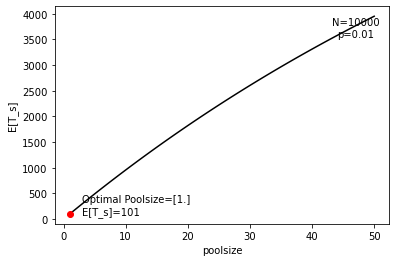

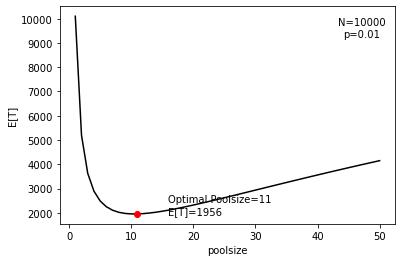

In [100]:
import math
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
N = 10000
percent = 1
prevalence = (percent * N) /100.0
p = prevalence/N

def expected_write_transactions(k):
    number_of_pools = N/k
    return number_of_pools

x = np.linspace(1,50,50).astype(float)
y = expected_write_transactions(x)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_write_transactions(x_n)

opt_idx = np.where(y==np.amin(y))
print("optimal poolsize={}".format(x[opt_idx]))
opt_k = y[opt_idx]
print(opt_k)
fig = plt.figure()
new=fig.add_subplot(111)
new.plot(x,y,"black")
new.plot(x[opt_idx]+3,y[opt_idx],"ro")
new.text(x[opt_idx]-13,y[opt_idx]+500,"Optimal Poolsize={}\nE[T_w]={}".format("N",np.amin(y_n)))
new.text(0.9,0.9,"N={}\np={}".format(N,p),ha='center', va='center', transform=new.transAxes)
plt.xlabel("poolsize")
plt.ylabel("E[T_w]")

def expected_scrubbing(k):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k))* number_of_pools
    return number_of_positive_pools*k

x = np.linspace(1,50,50).astype(float)
y = expected_scrubbing(x)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_scrubbing(x_n)

opt_idx = np.where(y==np.amin(y))
print("optimal poolsize={}".format(x[opt_idx]))
opt_k = y[opt_idx]
print(opt_k)
fig = plt.figure()
new=fig.add_subplot(111)
new.plot(x,y,"black")
new.plot(x_n[opt_idx],y_n[opt_idx],"ro")
new.text(x_n[opt_idx]+2,y_n[opt_idx]+3,"Optimal Poolsize={}\nE[T_s]={}".format(x[opt_idx],math.ceil(np.amin(y_n))))
new.text(0.9,0.9,"N={}\np={}".format(N,p),ha='center', va='center', transform=new.transAxes)
plt.xlabel("poolsize")
plt.ylabel("E[T_s]")

def expected_operations(k):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return number_of_pools + number_of_positive_pools*k

x = np.linspace(1,50,50).astype(float)
y = expected_operations(x)

x_n = np.linspace(1,N,N).astype(float)
y_n = expected_operations(x_n)

opt_idx = np.where(y_n==np.amin(y_n))
print("optimal poolsize={}".format(x_n[opt_idx]))
opt_k = y_n[opt_idx]
print(opt_k)
fig = plt.figure()
new=fig.add_subplot(111)
new.plot(x,y,"black")
new.plot(x_n[opt_idx],y_n[opt_idx],"ro")
new.text(x_n[opt_idx]+5,y_n[opt_idx],"Optimal Poolsize={}\nE[T]={}".format(int(x_n[np.where(y_n==np.amin(y_n))]),math.ceil(np.amin(y_n))))
new.text(0.9,0.9,"N={}\np={}".format(N,p),ha='center', va='center', transform=new.transAxes)
plt.xlabel("poolsize")
plt.ylabel("E[T]")
expected_operations(1)/expected_operations(3)


In [101]:
print("Expected Write Efficiency with optimal poolsize={}".format(expected_write_transactions(1)/expected_write_transactions(3)))
print("Expected Scrubbing Efficiency with optimal poolsize={}".format(expected_scrubbing(1)/expected_scrubbing(3)))
print("Expected Operation Count Efficiency with optimal poolsize={}".format(expected_operations(1)/expected_operations(3)))


Expected Write Efficiency with optimal poolsize=3.0
Expected Scrubbing Efficiency with optimal poolsize=0.3366890003703585
Expected Operation Count Efficiency with optimal poolsize=2.782106008338973


In [102]:
def optimal_pool_size(p):
    return np.ceil(1.24*np.power(p,-0.466))

def expected_operations(k,p):
    number_of_pools = N/k
    number_of_positive_pools = (1 - np.power((1-p),k)) * number_of_pools
    return number_of_pools + number_of_positive_pools*k

df = pd.DataFrame({"p":np.linspace(0.01,0.4,15)})
df["k"] = df.apply(lambda row: optimal_pool_size(row.p),axis=1)
df["T(S)"] = df.apply(lambda row: expected_operations(1,row.p)/expected_operations(row.k,row.p),axis=1)
df

,p,k,T(S)
0,0.010000,11.0,5.164369
1,0.037857,6.0,2.779725
2,0.065714,5.0,2.183243
3,0.093571,4.0,1.902021
4,0.121429,4.0,1.714226
5,0.149286,4.0,1.582522
6,0.177143,3.0,1.516581
7,0.205000,3.0,1.450281
8,0.232857,3.0,1.398014
9,0.260714,3.0,1.356655


In [103]:
expected_operations(1,0.43)/expected_operations(2,0.43)

1.2169177091311378

Text(0, 0.5, 'k')

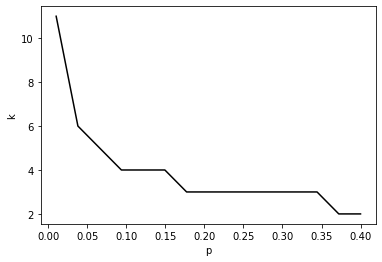

In [104]:
plt.plot(df["p"],df["k"],"black")
plt.xlabel("p")
plt.ylabel("k")